# K-means elbow method

From: https://pythonprogramminglanguage.com/kmeans-elbow-method/

Find k for kmeans using the elbow method?

The K-means algorithm can cluster observed data. But how many clusters (k) are there?

The elbow method finds the optimal value for k (#clusters).

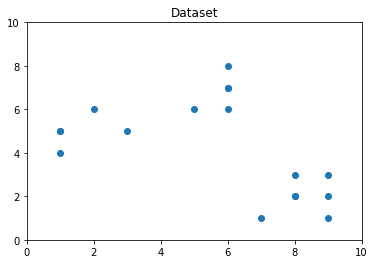

In [50]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [51]:
# data points
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
print (X)


[[3 5]
 [1 4]
 [1 5]
 [2 6]
 [1 5]
 [6 8]
 [6 6]
 [6 7]
 [5 6]
 [6 7]
 [7 1]
 [8 2]
 [9 1]
 [8 2]
 [9 3]
 [9 2]
 [8 3]]


We plot:
 - values for K on the X axis
 - the distortion on the Y axis (the values calculated with the cost function)

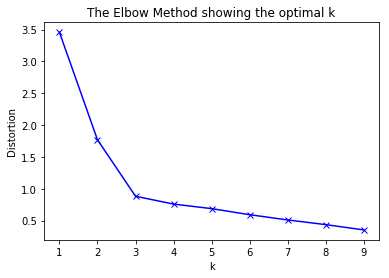

In [52]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    # number of clusters to form and number of centroids to generate
    kmeanModel = KMeans(n_clusters=k)
    # compute k-means clustering
    kmeanModel.fit(X)
    # min cost function - the total within-cluster sum of square (wss)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We observe:
 - When K increases, the centroids are closer to the clusters centroids.
 - The improvements will decline, at some point rapidly, creating the elbow shape.
 - The point on the elbow is the optimal value for K. In our test above, K=3.

From: http://www.awesomestats.in/python-cluster-validation/

Use a different cost function 

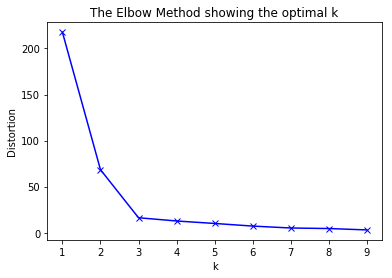

In [45]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    # number of clusters to form and number of centroids to generate
    kmeanModel = KMeans(n_clusters=k)
    # compute k-means clustering
    kmeanModel.fit(X)
    # inertia_ : float
    # sum of squared distances of samples to their closest cluster center
    distortions.append( kmeanModel.inertia_ )

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The observations above are still valid:

 - When K increases, the centroids are closer to the clusters centroids
 - The improvements will decline, at some point rapidly, creating the elbow shape
 - The point at the elbow is the optimal value for K. In the image above, K=3.